Companion notebook for Lecture 20. Spectral clustering demo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.datasets

Text(0.5, 1.0, 'Input (Unlabelled) data')

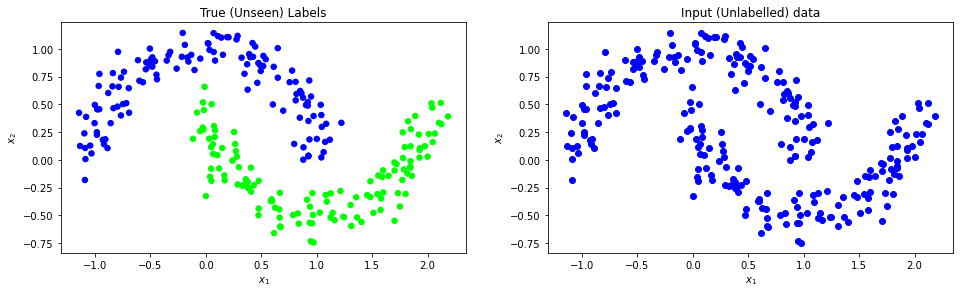

In [249]:
# generate a mixture model using sklearn's data generation function

N = 256 # total number of samples 

# K means on two moons

X, Y = skl.datasets.make_moons(n_samples=N, noise= 0.1, random_state=0)

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], color='b')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Input (Unlabelled) data')


In [250]:
# compute the weight matrix W for the vertices of our graph 

def eta(tt, rr):

  val = tt <= rr 

  return val.astype(float)

#def eta(tt, rr):

#  val = np.exp( - (tt**2)/(2*rr**2) ) 
  
#  return val.astype(float)



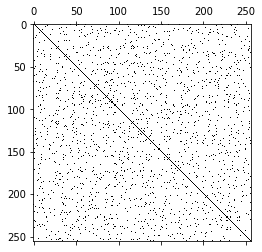

In [251]:
import scipy.spatial 

dist = scipy.spatial.distance_matrix( X, X, p =2)

r = 0.2

W = eta( dist, r)

plt.spy(W>=0.01)

In [252]:
# visualize the graph using NetworkX

import networkx as nx

G = nx.Graph()

for i in range(N):
  for j in range(N):
    if i != j and W[i,j] != 0 :
      G.add_edge(i, j, weight=W[i,j])

Text(0.5, 1.0, 'Proximity Graph')

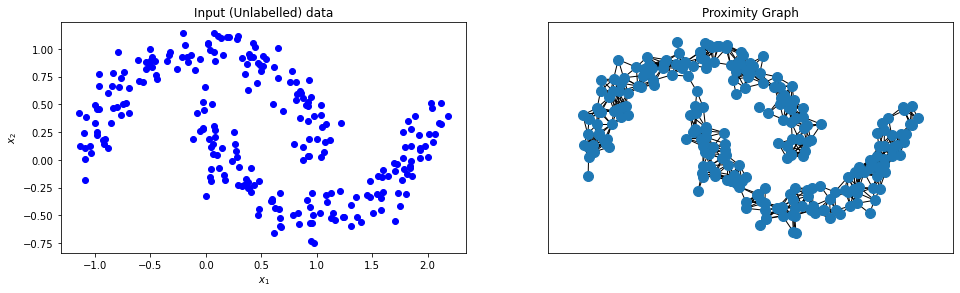

In [253]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], color='b')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('Input (Unlabelled) data')



nx.draw_networkx_nodes(G, X, node_size=100, ax = ax[1])
nx.draw_networkx_edges(G, X, ax = ax[1])
ax[1].set_aspect('equal')
ax[1].set_title('Proximity Graph')

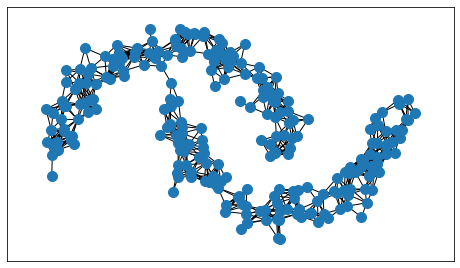

In [254]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

nx.draw_networkx_nodes(G, X, node_size=100, ax = ax)
nx.draw_networkx_edges(G, X, ax = ax)
ax.set_aspect('equal')

In [7]:
# compute Laplacian matrices 

d = np.sum(W, axis=1) # degree vector

D = np.diag(d)
Ds = np.diag(1/np.sqrt(d))
Di = np.diag(1/d)


L = D - W # unnormalized

Ln = np.dot(Ds, np.dot((D - W),Ds)) # normalized

In [8]:
# compute eigendecompositions 

ll, VV = np.linalg.eigh(L)

# we need to sort the eigenvalues and vectors 

idx = ll.argsort()
l = ll[idx]
V = VV[:, idx]

lln, VVn = np.linalg.eigh(Ln)

idxn = lln.argsort()
ln = lln[idxn]
Vn = VVn[:, idxn]

print(l[0:10])

print(ln[0:10])

[6.26927150e-16 5.58373464e-03 3.67794640e-02 4.30646612e-02
 1.48446922e-01 1.59560742e-01 3.18271327e-01 5.21084391e-01
 5.58970225e-01 6.36809592e-01]
[-1.06602207e-16  5.10610982e-04  3.42988072e-03  3.97206951e-03
  1.42251635e-02  1.53187493e-02  2.75003561e-02  5.52888761e-02
  6.22288755e-02  6.81161890e-02]


Text(0, 0.5, '$\\lambda$')

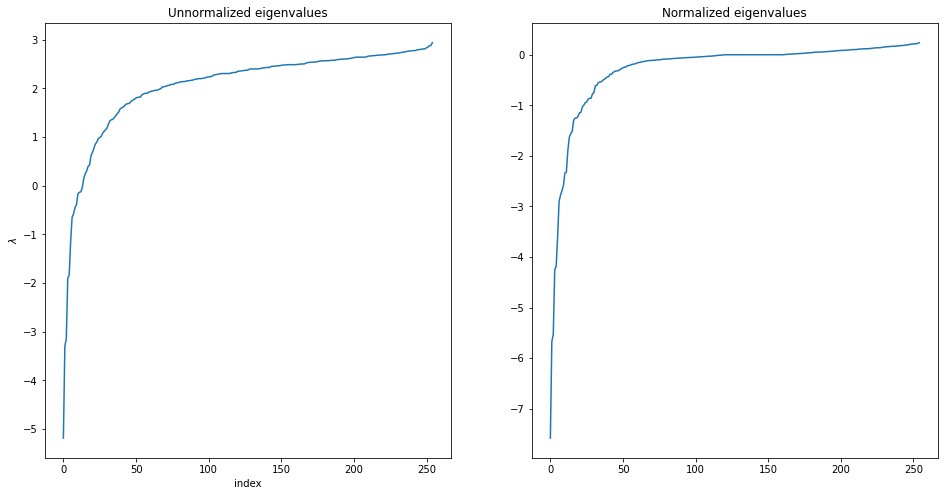

In [9]:
# plot eigenvalues 

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].plot(np.log(l[1:None]))
ax[0].set_title('Unnormalized eigenvalues')
ax[0].set_xlabel('index')
ax[0].set_ylabel('$\lambda$')


ax[1].plot(np.log(ln[1:None]))
ax[1].set_title('Normalized eigenvalues')
ax[0].set_xlabel('index')
ax[0].set_ylabel('$\lambda$')

Text(0.5, 0.92, 'Normalized embedding')

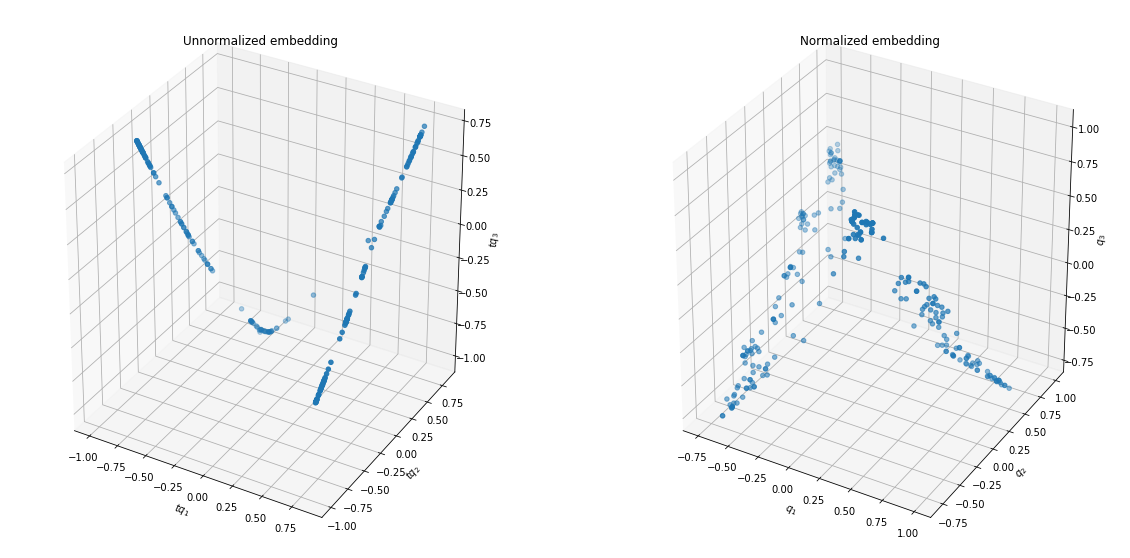

In [10]:
# 3D plot of Laplacian embedding with first three eigenvectors

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter( V[:,1]/np.abs(V[:,1]).max(), V[:,2]/np.abs(V[:,2]).max(), V[:,3]/np.abs(V[:,3]).max()  )
ax.set_xlabel('$tq_1$')
ax.set_ylabel('$tq_2$')
ax.set_zlabel('$tq_3$')
ax.set_title('Unnormalized embedding')

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter( Vn[:,1]/np.abs(Vn[:,1]).max(), Vn[:,2]/np.abs(Vn[:,2]).max(), Vn[:,3]/np.abs(Vn[:,3]).max()  )
ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_zlabel('$q_3$')
ax.set_title('Normalized embedding')

Text(0.5, 0.92, 'Normalized embedding')

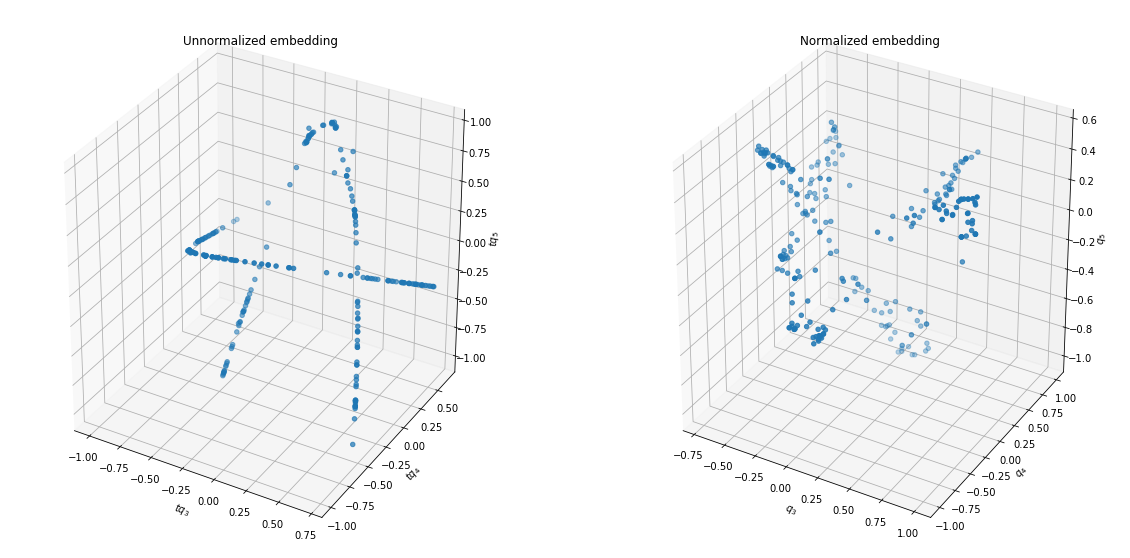

In [11]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter( V[:,3]/np.abs(V[:,3]).max(), V[:,4]/np.abs(V[:,4]).max(), V[:,5]/np.abs(V[:,5]).max()  )
ax.set_xlabel('$tq_3$')
ax.set_ylabel('$tq_4$')
ax.set_zlabel('$tq_5$')
ax.set_title('Unnormalized embedding')

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter( Vn[:,3]/np.abs(Vn[:,3]).max(), Vn[:,4]/np.abs(Vn[:,4]).max(), Vn[:,5]/np.abs(Vn[:,5]).max()  )
ax.set_xlabel('$q_3$')
ax.set_ylabel('$q_4$')
ax.set_zlabel('$q_5$')
ax.set_title('Normalized embedding')

In [12]:
# apply K means on the embedded data, only the first M dimensions 

M = 2


FX = V[:, 1:M+1]

FX = FX / np.abs(FX).max(axis=0)

FXn = Vn[:, 1:M+1]

FXn = FXn / np.abs(FXn).max(axis=0)

In [13]:
import sklearn.cluster

In [14]:
KMM = skl.cluster.KMeans(n_clusters=2, random_state=0).fit(FX)

KMMn = skl.cluster.KMeans(n_clusters=2, random_state=0).fit(FXn)

Text(0.5, 1.0, 'SC with Normalized Laplacian')

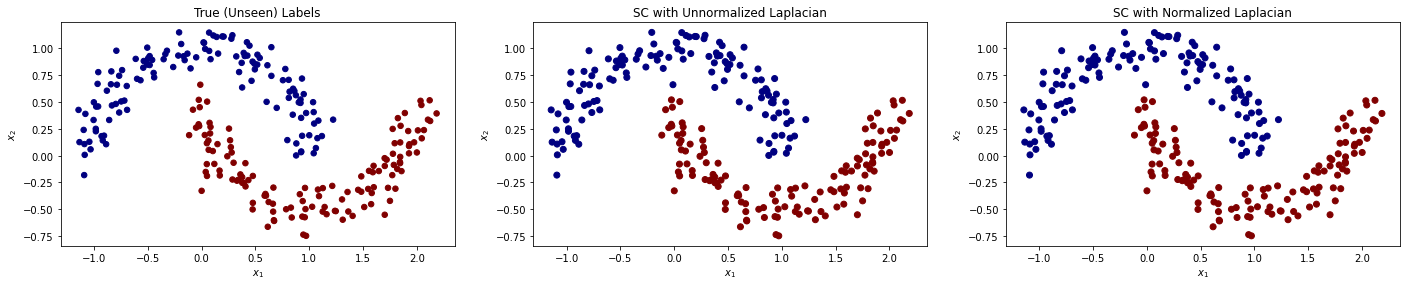

In [15]:
fig, ax = plt.subplots(1,3, figsize=(24,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='jet')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], c=KMM.labels_, cmap='jet')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('SC with Unnormalized Laplacian')

ax[2].scatter(X[:,0], X[:,1], c=KMMn.labels_, cmap='jet')
ax[2].set_aspect('equal')
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$x_2$')
ax[2].set_title('SC with Normalized Laplacian')

Text(0.5, 1.0, 'sign(Fiedler Vector) of Normalized Laplacian')

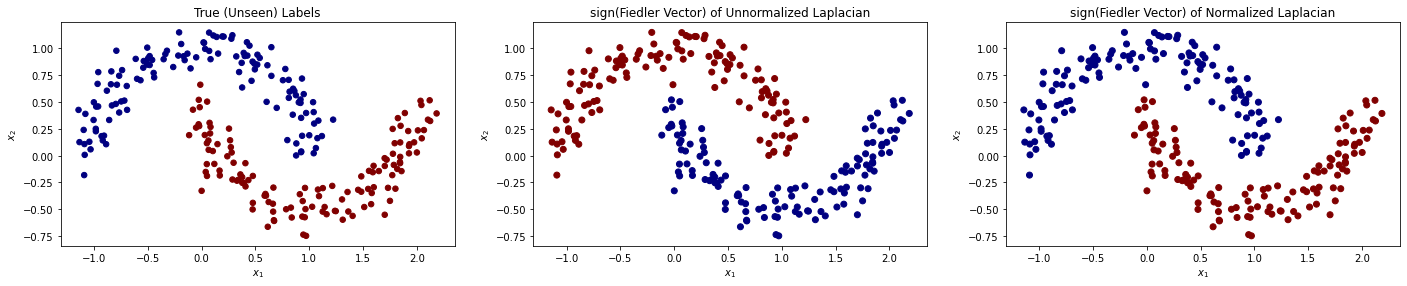

In [16]:
fig, ax = plt.subplots(1,3, figsize=(24,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='jet')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], c=np.sign(V[:,1]), cmap='jet')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('sign(Fiedler Vector) of Unnormalized Laplacian')

ax[2].scatter(X[:,0], X[:,1], c=np.sign(Vn[:,1]), cmap='jet')
ax[2].set_aspect('equal')
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$x_2$')
ax[2].set_title('sign(Fiedler Vector) of Normalized Laplacian')